# Chapter 2

In [1]:
# data prep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/numba/errors.py:102: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [62]:
import librosa as lr
from glob import glob
data_dir = '.'

# List all the wav files in the folder
norm_audio_files = glob(data_dir + '/normal__*.wav')
abnorm_audio_files = glob(data_dir + '/murmur__*.wav')

174979


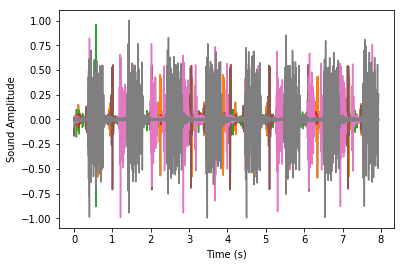

In [99]:
# Read in the first audio file, create the time array
norm_list = []
abnorm_list = []
sfreq = 0
for i in range(3):
    norm_audio, sfreq = lr.load(norm_audio_files[i])
    abnorm_audio, sfreq = lr.load(abnorm_audio_files[i])
    norm_list.append(norm_audio)
    abnorm_list.append(abnorm_audio)

norm_len = min([x.shape[0] for x in norm_list])
abnorm_len = min([x.shape[0] for x in abnorm_list])
max_idx = min([norm_len, abnorm_len])
print(max_idx)

firstn = True
for x in norm_list:
    if firstn:
        normal = x[:max_idx].reshape(-1,1)
        firstn = False
    x = x[:max_idx].reshape(-1,1)
    normal = np.hstack([normal, x])

firsta = True
for x in abnorm_list:
    if firsta:
        abnormal = x[:max_idx].reshape(-1,1)
        firsta = False
    x = x[:max_idx].reshape(-1,1)
    abnormal = np.hstack([abnormal, x])

time = np.arange(0, max_idx) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time,normal)
ax.plot(time,abnormal)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

def show_plot_and_make_titles():
   axs[0, 0].set(title="Normal Heartbeats")
   axs[0, 1].set(title="Abnormal Heartbeats")
   plt.tight_layout()
   plt.show()

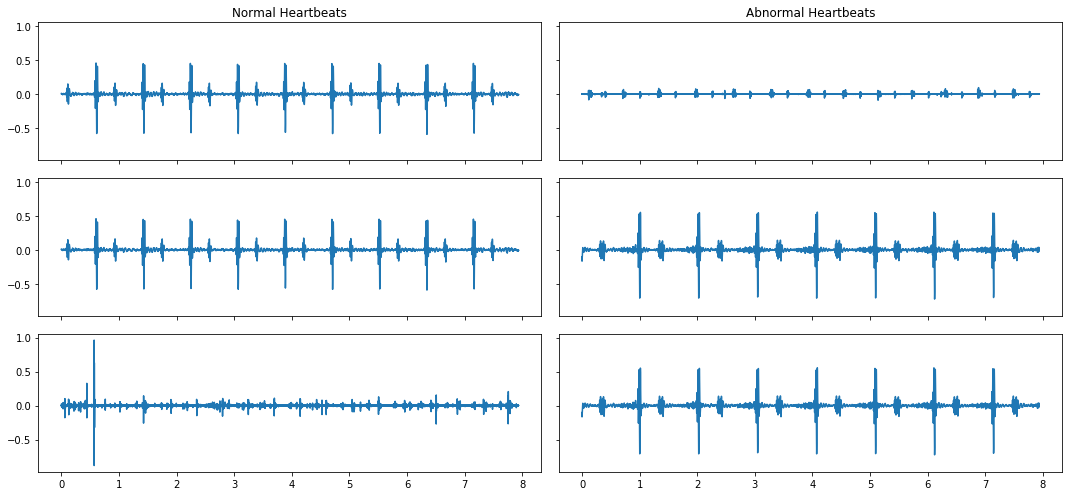

In [100]:
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(0, len(normal)) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

20647


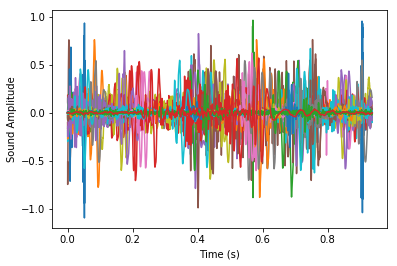

In [101]:
# data prep
# Read in the first audio file, create the time array
norm_list = []
abnorm_list = []
sfreq = 0
for i in range(31):
    norm_audio, sfreq = lr.load(norm_audio_files[i])
    abnorm_audio, sfreq = lr.load(abnorm_audio_files[i])
    norm_list.append(norm_audio)
    abnorm_list.append(abnorm_audio)

norm_len = min([x.shape[0] for x in norm_list])
abnorm_len = min([x.shape[0] for x in abnorm_list])
max_idx = min([norm_len, abnorm_len])
print(max_idx)

firstn = True
for x in norm_list:
    if firstn:
        normal = x[:max_idx].reshape(-1,1)
        firstn = False
    x = x[:max_idx].reshape(-1,1)
    normal = np.hstack([normal, x])

firsta = True
for x in abnorm_list:
    if firsta:
        abnormal = x[:max_idx].reshape(-1,1)
        firsta = False
    x = x[:max_idx].reshape(-1,1)
    abnormal = np.hstack([abnormal, x])

time = np.arange(0, max_idx) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time,normal)
ax.plot(time,abnormal)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

def show_plot_and_make_titles():
   axs[0, 0].set(title="Normal Heartbeats")
   axs[0, 1].set(title="Abnormal Heartbeats")
   plt.tight_layout()
   plt.show()

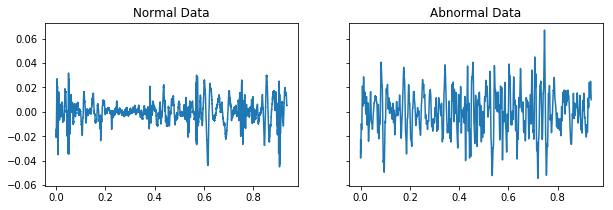

In [102]:
# Average across the time dimension of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(time, mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show()

In [175]:
# data prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
#norm_scale = mm.fit_transform(normal.T)
#abnorm_scale = mm.fit_transform(abnormal.T)
norm_scale = normal.T
abnorm_scale = abnormal.T

# add labels
good = np.insert(norm_scale, obj=0, values=0, axis=1)
bad  = np.insert(abnorm_scale, obj=0, values=1, axis=1)

# concat into Xy
Xy = np.concatenate([good, bad], axis=0)
y = Xy[:,0]
X = Xy[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [176]:
Xy.shape

(64, 20648)

In [177]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, f1_score

# Initialize and fit the model
model = LinearSVC()
model.fit(X_train, y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print((f1_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))
print(sum(predictions == y_test.squeeze()) / len(y_test))

0.2222222222222222
[[8 0]
 [7 1]]
0.5625


In [178]:
predictions.shape

(16,)

In [187]:
# 5+mins on air book
X_df = pd.DataFrame(X.T)

# rectify
audio_half_wave = X_df.apply(np.abs)

# Smooth by applying a rolling mean
audio_half_wave_smooth = audio_half_wave.rolling(500).mean()

# Plot the result
#audio_half_wave_smooth.plot(figsize=(10, 5))
#plt.show()

In [191]:
audio_half_wave_smooth.shape, np.mean(audio_half_wave_smooth, axis=0).shape

((20647, 64), (64,))

In [196]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
labels = y
model = LinearSVC()
#model = RandomForestClassifier()

# Calculate stats
means = np.mean(audio_half_wave_smooth, axis=0)
stds = np.std(audio_half_wave_smooth, axis=0)
maxs = np.max(audio_half_wave_smooth, axis=0)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
from sklearn.model_selection import cross_val_score

percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

0.7071428571428571


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y 

In [200]:
# data prep
import librosa as lr
audio = X_df

# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio.items():
    tempos.append(lr.beat.tempo(i_audio.values, sr=sfreq, hop_length=2**6, aggregate=None))

# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)

# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_std, tempos_max])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)


print(np.mean(percent_score))

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


0.5142857142857142


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y 

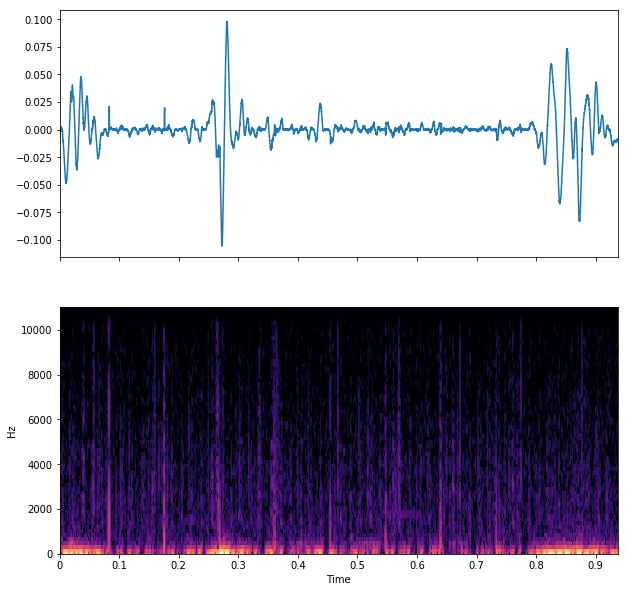

In [259]:
# Import the stft function
from librosa.core import stft
from librosa.core import amplitude_to_db
from librosa.display import specshow

audio = X_df[np.random.randint(X_df.shape[1])].values

# Prepare the STFT
HOP_LENGTH = 2**4
spec = np.abs(stft(audio, hop_length=HOP_LENGTH, n_fft=2**7))

# Convert into decibels
spec_db = amplitude_to_db(spec)

# Compare the raw audio to the spectrogram of the audio
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(time, audio)
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
plt.show()

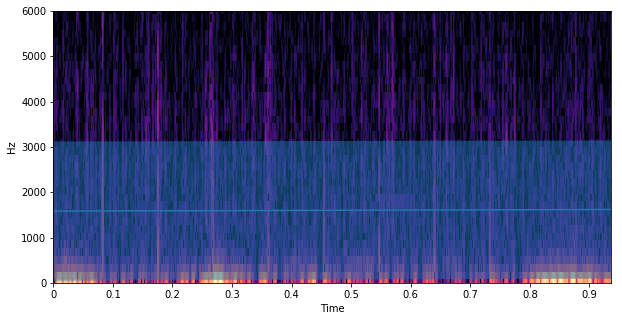

In [260]:
times_spec = np.arange(0, spec.shape[1])

import librosa as lr

# Calculate the spectral centroid and bandwidth for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]
centroids = lr.feature.spectral_centroid(S=spec)[0]

from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert spectrogram to decibels for visualization
spec_db = amplitude_to_db(spec)

# Display these features on top of the spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
ax = specshow(spec_db, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
ax.plot(times_spec, centroids)
ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
ax.set(ylim=[None, 6000])
plt.show()

In [301]:
def get_stft(col):
    audio = col.values
    spec = np.abs(stft(audio, hop_length=HOP_LENGTH, n_fft=2**7))
    return spec

spectrograms = []
for col in range(0,X_df.shape[1]):
    ts = X_df[col]
    print(ts.shape)
    spectrograms.append(get_stft(ts))
    
spectrograms[1]

(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)
(20647,)


array([[5.9181941e-01, 5.9133691e-01, 5.8938789e-01, ..., 7.2456846e+00,
        5.8603487e+00, 5.0346522e+00],
       [2.9838991e-01, 2.9623511e-01, 2.9411867e-01, ..., 4.1739607e+00,
        3.0232871e+00, 1.7140285e+00],
       [1.3149984e-02, 1.1722892e-02, 9.5483353e-03, ..., 6.3510454e-01,
        9.2362708e-01, 1.1180260e+00],
       ...,
       [7.6791341e-03, 6.5692877e-03, 3.8855921e-03, ..., 5.0568773e-04,
        1.0364003e-03, 1.3735410e-03],
       [7.6534101e-03, 6.5306756e-03, 3.8218447e-03, ..., 4.8514325e-04,
        1.0154237e-03, 1.3561817e-03],
       [7.5984187e-03, 6.4795143e-03, 3.7772523e-03, ..., 4.9193320e-04,
        1.0177044e-03, 1.3501754e-03]], dtype=float32)

In [309]:
# Loop through each spectrogram
bandwidths = []
centroids = []

for spec in spectrograms:
    # Calculate the mean spectral bandwidth
    this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=spec))
    # Calculate the mean spectral centroid
    this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=spec))
    # Collect the values
    bandwidths.append(this_mean_bandwidth)  
    centroids.append(this_mean_centroid)
    
# Create X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_max, tempos_std, bandwidths, centroids])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

0.6500000000000001


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y 